## Data Cleanup

In [41]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import csv module
import csv
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [3]:
#import each of the 5 files
beds_1 = pd.read_csv("./Resources/Neighborhood_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
beds_2 = pd.read_csv("./Resources/Neighborhood_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
beds_3 = pd.read_csv("./Resources/Neighborhood_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
beds_4 = pd.read_csv("./Resources/Neighborhood_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
beds_5 = pd.read_csv("./Resources/Neighborhood_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

#add a number of bedrooms column with the corresponding value
beds_1['BedroomCount'] = '1'
beds_2['BedroomCount'] = '2'
beds_3['BedroomCount'] = '3'
beds_4['BedroomCount'] = '4'
beds_5['BedroomCount'] = '5'

#create list with all dataframes
dfs = [beds_1, beds_2, beds_3, beds_4, beds_5]
#concatenate dataframes
all_homes = pd.concat(dfs, axis=0)
#display dataframe with all bedroom numbers
all_homes

RegionID  SizeRank              RegionName    RegionType StateName  \
0       112345         0                Maryvale  neighborhood        AZ   
1       274772         1        Northeast Dallas  neighborhood        TX   
2       192689         2                Paradise  neighborhood        NV   
3       270957         3         Upper East Side  neighborhood        NY   
4       118208         4       South Los Angeles  neighborhood        CA   
...        ...       ...                     ...           ...       ...   
3193    830181     25717       Woodcreek Reserve  neighborhood        TX   
3194    820175     25717           Mustang Lakes  neighborhood        TX   
3195    811067     25717  Sonoran Mountain Ranch  neighborhood        AZ   
3196    814062     25717           Whisper Point  neighborhood        GA   
3197    809911     25717                The Oaks  neighborhood        FL   

     State         City                                  Metro  \
0       AZ      Phoenix              Phoenix-Mesa-Chandler, AZ   
1       TX       Dallas        Dallas-Fort Worth-Arlington, TX   
2       NV    Las Vegas       Las Vegas-Henderson-Paradise, NV   
3       NY     New York  New York-Newark-Jersey City, NY-NJ-PA   
4       CA  Los Angeles     Los Angeles-Long Beach-Anaheim, CA   
...    ...          ...                                    ...   
3193    TX         Katy   Houston-The Woodlands-Sugar Land, TX   
3194    TX     McKinney        Dallas-Fort Worth-Arlington, TX   
3195    AZ       Peoria              Phoenix-Mesa-Chandler, AZ   
3196    GA      Cumming   Atlanta-Sandy Springs-Alpharetta, GA   
3197    FL    Kissimmee          Orlando-Kissimmee-Sanford, FL   

              CountyName    2000-01-31  ...     2022-06-30     2022-07-31  \
0        Maricopa County  30420.866025  ...  159810.636253  164077.534923   
1          Dallas County           NaN  ...  103317.657820  104393.816749   
2           Clark County  49986.221081  ...  149460.002833  153105.465654   
3        New York County  94614.487884  ...  755916.078235  764012.120497   
4     Los Angeles County  69988.425977  ...  485481.426049  486580.456928   
...                  ...           ...  ...            ...            ...   
3193    Fort Bend County           NaN  ...            NaN            NaN   
3194       Collin County           NaN  ...  985892.379616  987388.092213   
3195     Maricopa County           NaN  ...  696938.304137  701401.130017   
3196      Forsyth County           NaN  ...  548789.995113  556036.001213   
3197      Osceola County           NaN  ...  543295.098134  549731.678669   

         2022-08-31     2022-09-30     2022-10-31     2022-11-30  \
0     166892.575626  167891.849104  167668.667831  166772.183742   
1     104571.881853  104541.549613  104989.885463  105764.102952   
2     155533.790336  156093.465309  155438.315700  154077.196109   
3     772229.342304  775763.275229  775399.444096  770788.281963   
4     486335.773930  486795.563897  486584.587848  487577.807182   
...             ...            ...            ...            ...   
3193            NaN            NaN            NaN            NaN   
3194  981904.911376  972507.639954  964804.184063  962273.140182   
3195  700321.791967  695236.546047  689239.735625  682255.740699   
3196  559666.911014  559929.682784  559773.981857  559787.604718   
3197  553070.768156  553385.352995  552299.699299  550533.574760   

         2022-12-31     2023-01-31     2023-02-28  BedroomCount  
0     165202.552880  165691.824773  166230.223127             1  
1     105990.598371  110707.020381  116762.814233             1  
2     152375.924267  154123.014075  157576.726041             1  
3     763008.581940  758376.785746  756124.193612             1  
4     486808.846238  489861.966210  489152.209949             1  
...             ...            ...            ...           ...  
3193            NaN            NaN  768264.822581             5  
3194  961214.765809  962222.39

In [4]:
#keep only California values
all_homes = all_homes[all_homes['State']=='CA']
#display dataframe
all_homes

RegionID  SizeRank             RegionName    RegionType StateName State  \
4       118208         4      South Los Angeles  neighborhood        CA    CA   
7       268496         7  Southeast Los Angeles  neighborhood        CA    CA   
24       32059        24              Hollywood  neighborhood        CA    CA   
27      275237        28              Roosevelt  neighborhood        CA    CA   
29      273565        32          East San Jose  neighborhood        CA    CA   
...        ...       ...                    ...           ...       ...   ...   
3139    816654     23073         Wisteria Place  neighborhood        CA    CA   
3143    268594     23581              Wildhorse  neighborhood        CA    CA   
3147    810981     23993          Suburbia Park  neighborhood        CA    CA   
3172    276536     25717             River Oaks  neighborhood        CA    CA   
3180    775702     25717              Stonegate  neighborhood        CA    CA   

                  City                               Metro  \
4          Los Angeles  Los Angeles-Long Beach-Anaheim, CA   
7          Los Angeles  Los Angeles-Long Beach-Anaheim, CA   
24         Los Angeles  Los Angeles-Long Beach-Anaheim, CA   
27              Fresno                          Fresno, CA   
29            San Jose  San Jose-Sunnyvale-Santa Clara, CA   
...                ...                                 ...   
3139         Elk Grove     Sacramento-Roseville-Folsom, CA   
3143             Davis     Sacramento-Roseville-Folsom, CA   
3147  Huntington Beach  Los Angeles-Long Beach-Anaheim, CA   
3172       Bakersfield                     Bakersfield, CA   
3180            Irvine  Los Angeles-Long Beach-Anaheim, CA   

              CountyName     2000-01-31  ...    2022-06-30    2022-07-31  \
4     Los Angeles County   69988.425977  ...  4.854814e+05  4.865805e+05   
7     Los Angeles County   57984.074647  ...  4.106229e+05  4.137428e+05   
24    Los Angeles County  108479.341441  ...  6.109023e+05  6.119780e+05   
27         Fresno County   10372.228735  ...  1.126375e+05  1.137549e+05   
29    Santa Clara County            NaN  ...  4.655982e+05  4.656290e+05   
...                  ...            ...  ...           ...           ...   
3139   Sacramento County            NaN  ...  8.566496e+05  8.562034e+05   
3143         Yolo County            NaN  ...  1.177278e+06  1.180328e+06   
3147       Orange County            NaN  ...  1.392844e+06  1.401822e+06   
3172         Kern County            NaN  ...  5.611024e+05  5.621888e+05   
3180       Orange County            NaN  ...  2.554670e+06  2.572940e+06   

        2022-08-31    2022-09-30    2022-10-31    2022-11-30    2022-12-31  \
4     4.863358e+05  4.867956e+05  4.865846e+05  4.875778e+05  4.868088e+05   
7     4.164494e+05  4.194308e+05  4.208475e+05  4.225508e+05  4.225150e+05   
24    6.092390e+05  6.046226e+05  6.013350e+05  6.009798e+05  6.010169e+05   
27    1.140472e+05  1.135891e+05  1.131310e+05  1.126080e+05  1.123167e+05   
29    4.636045e+05  4.602730e+05  4.563091e+05  4.527820e+05  4.494273e+05   
...            ...           ...           ...           ...           ...   
3139  8.502680e+05  8.416499e+05  8.347608e+05  8.302537e+05  8.261249e+05   
3143  1.181081e+06  1.178730e+06  1.177077e+06  1.176723e+06  1.174847e+06   
3147  1.403423e+06  1.403561e+06  1.407924e+06  1.413183e+06  1.415136e+06   
3172  5.601033e+05  5.556210e+05  5.516142e+05  5.487080e+05  5.468023e+05   
3180  2.578369e+06  2.572896e+06  2.564676e+06  2.561034e+06  2.559385e+06   

        2023-01-31    2023-02-28  BedroomCount  
4     4.898620e+05  4.891522e+05             1  
7     4.276280e+05  4.306788e+05             1  
24    6.033713e+05  6.023556e+05             1  
27    1.158637e+05  1.204072e+05             1  
29    4.514370e+05  4.540102e+05             1  
...            ...           ...           ...  
3139  8.211991e+05  8.180758e+05             5  
3143  1.163805e+06  1.153217e+06             5

In [5]:
#get list of date columns and keep only values from 2019 forward
date_cols = [col for col in all_homes.columns if col >= '2019_01_01']
#select only date columns and update the dataframe
all_homes = all_homes[date_cols]
#display
all_homes

RegionID  SizeRank             RegionName    RegionType StateName State  \
4       118208         4      South Los Angeles  neighborhood        CA    CA   
7       268496         7  Southeast Los Angeles  neighborhood        CA    CA   
24       32059        24              Hollywood  neighborhood        CA    CA   
27      275237        28              Roosevelt  neighborhood        CA    CA   
29      273565        32          East San Jose  neighborhood        CA    CA   
...        ...       ...                    ...           ...       ...   ...   
3139    816654     23073         Wisteria Place  neighborhood        CA    CA   
3143    268594     23581              Wildhorse  neighborhood        CA    CA   
3147    810981     23993          Suburbia Park  neighborhood        CA    CA   
3172    276536     25717             River Oaks  neighborhood        CA    CA   
3180    775702     25717              Stonegate  neighborhood        CA    CA   

                  City                               Metro  \
4          Los Angeles  Los Angeles-Long Beach-Anaheim, CA   
7          Los Angeles  Los Angeles-Long Beach-Anaheim, CA   
24         Los Angeles  Los Angeles-Long Beach-Anaheim, CA   
27              Fresno                          Fresno, CA   
29            San Jose  San Jose-Sunnyvale-Santa Clara, CA   
...                ...                                 ...   
3139         Elk Grove     Sacramento-Roseville-Folsom, CA   
3143             Davis     Sacramento-Roseville-Folsom, CA   
3147  Huntington Beach  Los Angeles-Long Beach-Anaheim, CA   
3172       Bakersfield                     Bakersfield, CA   
3180            Irvine  Los Angeles-Long Beach-Anaheim, CA   

              CountyName    2020-01-31  ...    2022-06-30    2022-07-31  \
4     Los Angeles County  3.504032e+05  ...  4.854814e+05  4.865805e+05   
7     Los Angeles County  3.126588e+05  ...  4.106229e+05  4.137428e+05   
24    Los Angeles County  4.535418e+05  ...  6.109023e+05  6.119780e+05   
27         Fresno County           NaN  ...  1.126375e+05  1.137549e+05   
29    Santa Clara County  3.948517e+05  ...  4.655982e+05  4.656290e+05   
...                  ...           ...  ...           ...           ...   
3139   Sacramento County  7.071315e+05  ...  8.566496e+05  8.562034e+05   
3143         Yolo County  9.863602e+05  ...  1.177278e+06  1.180328e+06   
3147       Orange County  1.087736e+06  ...  1.392844e+06  1.401822e+06   
3172         Kern County  4.217448e+05  ...  5.611024e+05  5.621888e+05   
3180       Orange County           NaN  ...  2.554670e+06  2.572940e+06   

        2022-08-31    2022-09-30    2022-10-31    2022-11-30    2022-12-31  \
4     4.863358e+05  4.867956e+05  4.865846e+05  4.875778e+05  4.868088e+05   
7     4.164494e+05  4.194308e+05  4.208475e+05  4.225508e+05  4.225150e+05   
24    6.092390e+05  6.046226e+05  6.013350e+05  6.009798e+05  6.010169e+05   
27    1.140472e+05  1.135891e+05  1.131310e+05  1.126080e+05  1.123167e+05   
29    4.636045e+05  4.602730e+05  4.563091e+05  4.527820e+05  4.494273e+05   
...            ...           ...           ...           ...           ...   
3139  8.502680e+05  8.416499e+05  8.347608e+05  8.302537e+05  8.261249e+05   
3143  1.181081e+06  1.178730e+06  1.177077e+06  1.176723e+06  1.174847e+06   
3147  1.403423e+06  1.403561e+06  1.407924e+06  1.413183e+06  1.415136e+06   
3172  5.601033e+05  5.556210e+05  5.516142e+05  5.487080e+05  5.468023e+05   
3180  2.578369e+06  2.572896e+06  2.564676e+06  2.561034e+06  2.559385e+06   

        2023-01-31    2023-02-28  BedroomCount  
4     4.898620e+05  4.891522e+05             1  
7     4.276280e+05  4.306788e+05             1  
24    6.033713e+05  6.023556e+05             1  
27    1.158637e+05  1.204072e+05             1  
29    4.514370e+05  4.540102e+05             1  
...            ...           ...           ...  
3139  8.211991e+05  8.180758e+05             5  
3143  1.163805e+06  1.153217e+06             5  
3147  1.4

In [6]:
#drop columns that we don't need
all_homes = all_homes.drop(columns=['SizeRank', 'RegionType', 'StateName'])
#rename some columns
all_homes = all_homes.rename(columns={'RegionName':'Neighborhood', 'CountyName':'County'})
#display
all_homes

RegionID           Neighborhood State              City  \
4       118208      South Los Angeles    CA       Los Angeles   
7       268496  Southeast Los Angeles    CA       Los Angeles   
24       32059              Hollywood    CA       Los Angeles   
27      275237              Roosevelt    CA            Fresno   
29      273565          East San Jose    CA          San Jose   
...        ...                    ...   ...               ...   
3139    816654         Wisteria Place    CA         Elk Grove   
3143    268594              Wildhorse    CA             Davis   
3147    810981          Suburbia Park    CA  Huntington Beach   
3172    276536             River Oaks    CA       Bakersfield   
3180    775702              Stonegate    CA            Irvine   

                                   Metro              County    2020-01-31  \
4     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County  3.504032e+05   
7     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County  3.126588e+05   
24    Los Angeles-Long Beach-Anaheim, CA  Los Angeles County  4.535418e+05   
27                            Fresno, CA       Fresno County           NaN   
29    San Jose-Sunnyvale-Santa Clara, CA  Santa Clara County  3.948517e+05   
...                                  ...                 ...           ...   
3139     Sacramento-Roseville-Folsom, CA   Sacramento County  7.071315e+05   
3143     Sacramento-Roseville-Folsom, CA         Yolo County  9.863602e+05   
3147  Los Angeles-Long Beach-Anaheim, CA       Orange County  1.087736e+06   
3172                     Bakersfield, CA         Kern County  4.217448e+05   
3180  Los Angeles-Long Beach-Anaheim, CA       Orange County           NaN   

        2020-02-29    2020-03-31    2020-04-30  ...    2022-06-30  \
4     3.542174e+05  3.576813e+05  3.604667e+05  ...  4.854814e+05   
7     3.144760e+05  3.158220e+05  3.171313e+05  ...  4.106229e+05   
24    4.551945e+05  4.551154e+05  4.542932e+05  ...  6.109023e+05   
27    6.636845e+04  7.043193e+04  7.503552e+04  ...  1.126375e+05   
29    3.974668e+05  3.996162e+05  4.004227e+05  ...  4.655982e+05   
...            ...           ...           ...  ...           ...   
3139  7.102013e+05  7.138016e+05  7.166622e+05  ...  8.566496e+05   
3143  9.879993e+05  9.916274e+05  9.958642e+05  ...  1.177278e+06   
3147  1.086501e+06  1.086728e+06  1.088662e+06  ...  1.392844e+06   
3172  4.210598e+05  4.199625e+05  4.197188e+05  ...  5.611024e+05   
3180           NaN           NaN           NaN  ...  2.554670e+06   

        2022-07-31    2022-08-31    2022-09-30    2022-10-31    2022-11-30  \
4     4.865805e+05  4.863358e+05  4.867956e+05  4.865846e+05  4.875778e+05   
7     4.137428e+05  4.164494e+05  4.194308e+05  4.208475e+05  4.225508e+05   
24    6.119780e+05  6.092390e+05  6.046226e+05  6.013350e+05  6.009798e+05   
27    1.137549e+05  1.140472e+05  1.135891e+05  1.131310e+05  1.126080e+05   
29    4.656290e+05  4.636045e+05  4.602730e+05  4.563091e+05  4.527820e+05   
...            ...           ...           ...           ...           ...   
3139  8.562034e+05  8.502680e+05  8.416499e+05  8.347608e+05  8.302537e+05   
3143  1.180328e+06  1.181081e+06  1.178730e+06  1.177077e+06  1.176723e+06   
3147  1.401822e+06  1.403423e+06  1.403561e+06  1.407924e+06  1.413183e+06   
3172  5.621888e+05  5.601033e+05  5.556210e+05  5.516142e+05  5.487080e+05   
3180  2.572940e+06  2.578369e+06  2.572896e+06  2.564676e+06  2.561034e+06   

        2022-12-31    2023-01-31    2023-02-28  BedroomCount  
4     4.868088e+05  4.898620e+05  4.891522e+05             1  
7     4.225150e+05  4.276280e+05  4.306788e+05             1  
24    6.010169e+05  6.033713e+05  6.023556e+05             1  
27    1.123167e+05  1.158637e+05  1.204072e+05             1  
29    4.494273e+05  4.514370e+05  4.540102e+05             1  
...            ...           ...           ...           ...  
3139  8.261249e+05  8.211991e+05  8.180758e+05             5  
3143  1.174847e+06

In [7]:
#count NaN values in all columns
nan_counts = all_homes.isna().sum()
print(nan_counts)

RegionID         0
Neighborhood     0
State            0
City             0
Metro            2
County           0
2020-01-31      80
2020-02-29      88
2020-03-31      84
2020-04-30      66
2020-05-31      53
2020-06-30      53
2020-07-31      54
2020-08-31      54
2020-09-30      67
2020-10-31      75
2020-11-30      67
2020-12-31      53
2021-01-31      52
2021-02-28      37
2021-03-31      37
2021-04-30      37
2021-05-31      37
2021-06-30      37
2021-07-31      57
2021-08-31      61
2021-09-30      59
2021-10-31      50
2021-11-30      37
2021-12-31      37
2022-01-31      37
2022-02-28      24
2022-03-31      24
2022-04-30      24
2022-05-31      24
2022-06-30      24
2022-07-31      24
2022-08-31      23
2022-09-30      23
2022-10-31      23
2022-11-30      23
2022-12-31      23
2023-01-31      30
2023-02-28       6
BedroomCount     0
dtype: int64


In [8]:
#drop rows without values in Metro column
all_homes_dropped = all_homes.dropna(subset=['Metro']) 
#drop rows with missing values
all_homes_dropped = all_homes_dropped.dropna()
#display
all_homes_dropped

RegionID           Neighborhood State              City  \
4       118208      South Los Angeles    CA       Los Angeles   
7       268496  Southeast Los Angeles    CA       Los Angeles   
29      273565          East San Jose    CA          San Jose   
36      273088                Bullard    CA            Fresno   
42      276652          West San Jose    CA          San Jose   
...        ...                    ...   ...               ...   
3138    416964           Palo del Amo    CA          Torrance   
3139    816654         Wisteria Place    CA         Elk Grove   
3143    268594              Wildhorse    CA             Davis   
3147    810981          Suburbia Park    CA  Huntington Beach   
3172    276536             River Oaks    CA       Bakersfield   

                                   Metro              County    2020-01-31  \
4     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County  3.504032e+05   
7     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County  3.126588e+05   
29    San Jose-Sunnyvale-Santa Clara, CA  Santa Clara County  3.948517e+05   
36                            Fresno, CA       Fresno County  9.909793e+04   
42    San Jose-Sunnyvale-Santa Clara, CA  Santa Clara County  4.881972e+05   
...                                  ...                 ...           ...   
3138  Los Angeles-Long Beach-Anaheim, CA  Los Angeles County  1.138242e+06   
3139     Sacramento-Roseville-Folsom, CA   Sacramento County  7.071315e+05   
3143     Sacramento-Roseville-Folsom, CA         Yolo County  9.863602e+05   
3147  Los Angeles-Long Beach-Anaheim, CA       Orange County  1.087736e+06   
3172                     Bakersfield, CA         Kern County  4.217448e+05   

        2020-02-29    2020-03-31    2020-04-30  ...    2022-06-30  \
4     3.542174e+05  3.576813e+05  3.604667e+05  ...  4.854814e+05   
7     3.144760e+05  3.158220e+05  3.171313e+05  ...  4.106229e+05   
29    3.974668e+05  3.996162e+05  4.004227e+05  ...  4.655982e+05   
36    1.034405e+05  1.072797e+05  1.118589e+05  ...  1.542229e+05   
42    4.923736e+05  4.952912e+05  4.945558e+05  ...  5.523159e+05   
...            ...           ...           ...  ...           ...   
3138  1.138178e+06  1.136606e+06  1.136593e+06  ...  1.525938e+06   
3139  7.102013e+05  7.138016e+05  7.166622e+05  ...  8.566496e+05   
3143  9.879993e+05  9.916274e+05  9.958642e+05  ...  1.177278e+06   
3147  1.086501e+06  1.086728e+06  1.088662e+06  ...  1.392844e+06   
3172  4.210598e+05  4.199625e+05  4.197188e+05  ...  5.611024e+05   

        2022-07-31    2022-08-31    2022-09-30    2022-10-31    2022-11-30  \
4     4.865805e+05  4.863358e+05  4.867956e+05  4.865846e+05  4.875778e+05   
7     4.137428e+05  4.164494e+05  4.194308e+05  4.208475e+05  4.225508e+05   
29    4.656290e+05  4.636045e+05  4.602730e+05  4.563091e+05  4.527820e+05   
36    1.566227e+05  1.584479e+05  1.590793e+05  1.591661e+05  1.582389e+05   
42    5.508983e+05  5.468541e+05  5.420828e+05  5.384330e+05  5.365058e+05   
...            ...           ...           ...           ...           ...   
3138  1.528816e+06  1.525721e+06  1.520867e+06  1.520738e+06  1.524223e+06   
3139  8.562034e+05  8.502680e+05  8.416499e+05  8.347608e+05  8.302537e+05   
3143  1.180328e+06  1.181081e+06  1.178730e+06  1.177077e+06  1.176723e+06   
3147  1.401822e+06  1.403423e+06  1.403561e+06  1.407924e+06  1.413183e+06   
3172  5.621888e+05  5.601033e+05  5.556210e+05  5.516142e+05  5.487080e+05   

        2022-12-31    2023-01-31    2023-02-28  BedroomCount  
4     4.868088e+05  4.898620e+05  4.891522e+05             1  
7     4.225150e+05  4.276280e+05  4.306788e+05             1  
29    4.494273e+05  4.514370e+05  4.540102e+05             1  
36    1.575233e+05  1.625226e+05  1.675916e+05             1  
42    5.351513e+05  5.513956e+05  5.736734e+05             1  
...            ...           ...           ...           ...  
3138  1.526842e+06  1.517614e+06  1.500845e+06             5  
3139  8.261249e+05

In [9]:
#count NaN values in all columns
nan_counts = all_homes_dropped.isna().sum()
print(nan_counts)

RegionID        0
Neighborhood    0
State           0
City            0
Metro           0
County          0
2020-01-31      0
2020-02-29      0
2020-03-31      0
2020-04-30      0
2020-05-31      0
2020-06-30      0
2020-07-31      0
2020-08-31      0
2020-09-30      0
2020-10-31      0
2020-11-30      0
2020-12-31      0
2021-01-31      0
2021-02-28      0
2021-03-31      0
2021-04-30      0
2021-05-31      0
2021-06-30      0
2021-07-31      0
2021-08-31      0
2021-09-30      0
2021-10-31      0
2021-11-30      0
2021-12-31      0
2022-01-31      0
2022-02-28      0
2022-03-31      0
2022-04-30      0
2022-05-31      0
2022-06-30      0
2022-07-31      0
2022-08-31      0
2022-09-30      0
2022-10-31      0
2022-11-30      0
2022-12-31      0
2023-01-31      0
2023-02-28      0
BedroomCount    0
dtype: int64


In [10]:
#round the numerical values
all_homes_dropped = all_homes_dropped.round()

all_homes_dropped

RegionID           Neighborhood State              City  \
4       118208      South Los Angeles    CA       Los Angeles   
7       268496  Southeast Los Angeles    CA       Los Angeles   
29      273565          East San Jose    CA          San Jose   
36      273088                Bullard    CA            Fresno   
42      276652          West San Jose    CA          San Jose   
...        ...                    ...   ...               ...   
3138    416964           Palo del Amo    CA          Torrance   
3139    816654         Wisteria Place    CA         Elk Grove   
3143    268594              Wildhorse    CA             Davis   
3147    810981          Suburbia Park    CA  Huntington Beach   
3172    276536             River Oaks    CA       Bakersfield   

                                   Metro              County  2020-01-31  \
4     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County    350403.0   
7     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County    312659.0   
29    San Jose-Sunnyvale-Santa Clara, CA  Santa Clara County    394852.0   
36                            Fresno, CA       Fresno County     99098.0   
42    San Jose-Sunnyvale-Santa Clara, CA  Santa Clara County    488197.0   
...                                  ...                 ...         ...   
3138  Los Angeles-Long Beach-Anaheim, CA  Los Angeles County   1138242.0   
3139     Sacramento-Roseville-Folsom, CA   Sacramento County    707131.0   
3143     Sacramento-Roseville-Folsom, CA         Yolo County    986360.0   
3147  Los Angeles-Long Beach-Anaheim, CA       Orange County   1087736.0   
3172                     Bakersfield, CA         Kern County    421745.0   

      2020-02-29  2020-03-31  2020-04-30  ...  2022-06-30  2022-07-31  \
4       354217.0    357681.0    360467.0  ...    485481.0    486580.0   
7       314476.0    315822.0    317131.0  ...    410623.0    413743.0   
29      397467.0    399616.0    400423.0  ...    465598.0    465629.0   
36      103441.0    107280.0    111859.0  ...    154223.0    156623.0   
42      492374.0    495291.0    494556.0  ...    552316.0    550898.0   
...          ...         ...         ...  ...         ...         ...   
3138   1138178.0   1136606.0   1136593.0  ...   1525938.0   1528816.0   
3139    710201.0    713802.0    716662.0  ...    856650.0    856203.0   
3143    987999.0    991627.0    995864.0  ...   1177278.0   1180328.0   
3147   1086501.0   1086728.0   1088662.0  ...   1392844.0   1401822.0   
3172    421060.0    419963.0    419719.0  ...    561102.0    562189.0   

      2022-08-31  2022-09-30  2022-10-31  2022-11-30  2022-12-31  2023-01-31  \
4       486336.0    486796.0    486585.0    487578.0    486809.0    489862.0   
7       416449.0    419431.0    420848.0    422551.0    422515.0    427628.0   
29      463605.0    460273.0    456309.0    452782.0    449427.0    451437.0   
36      158448.0    159079.0    159166.0    158239.0    157523.0    162523.0   
42      546854.0    542083.0    538433.0    536506.0    535151.0    551396.0   
...          ...         ...         ...         ...         ...         ...   
3138   1525721.0   1520867.0   1520738.0   1524223.0   1526842.0   1517614.0   
3139    850268.0    841650.0    834761.0    830254.0    826125.0    821199.0   
3143   1181081.0   1178730.0   1177077.0   1176723.0   1174847.0   1163805.0   
3147   1403423.0   1403561.0   1407924.0   1413183.0   1415136.0   1403629.0   
3172    560103.0    555621.0    551614.0    548708.0    546802.0    541592.0   

      2023-02-28  BedroomCount  
4       489152.0             1  
7       430679.0             1  
29      454010.0             1  
36      167592.0             1  
42      573673.0             1  
...          ...           ...  
3138   1500845.0             5  
3139    818076.0             5  
3143   1153217.0             5  
3147   1391961.0             5  
3172    537907.0             5  

[5740 rows x 45 columns]

In [11]:
#export as csv
all_homes_dropped.to_csv("./housing_prices_data.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'housing_prices_data.csv'

In [13]:
#get columns to keep
keep_cols = ['RegionID', 'Neighborhood', 'State', 'City', 'Metro', 'County']

#keep only the desired columns and drop duplicates
unique_homes = all_homes_dropped[keep_cols].drop_duplicates(subset='RegionID')

#group by RegionID and compute the median for each group
neighborhood_medians = all_homes_dropped.groupby('RegionID').median()

#merge the unique_homes dataframe with the median values based on RegionID
neighborhoods_df = pd.merge(unique_homes, neighborhood_medians, on='RegionID', suffixes=('', '_median'))

neighborhoods_df

RegionID           Neighborhood State              City  \
0       118208      South Los Angeles    CA       Los Angeles   
1       268496  Southeast Los Angeles    CA       Los Angeles   
2       273565          East San Jose    CA          San Jose   
3       273088                Bullard    CA            Fresno   
4       276652          West San Jose    CA          San Jose   
...        ...                    ...   ...               ...   
2085    760897             Lighthouse    CA   West Sacramento   
2086    761546           Hawks Pointe    CA         Fullerton   
2087    816654         Wisteria Place    CA         Elk Grove   
2088    810981          Suburbia Park    CA  Huntington Beach   
2089    276536             River Oaks    CA       Bakersfield   

                                   Metro              County  2020-01-31  \
0     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County    534759.0   
1     Los Angeles-Long Beach-Anaheim, CA  Los Angeles County    450908.0   
2     San Jose-Sunnyvale-Santa Clara, CA  Santa Clara County    767886.0   
3                             Fresno, CA       Fresno County    334908.5   
4     San Jose-Sunnyvale-Santa Clara, CA  Santa Clara County   1341012.0   
...                                  ...                 ...         ...   
2085     Sacramento-Roseville-Folsom, CA         Yolo County    802182.0   
2086  Los Angeles-Long Beach-Anaheim, CA       Orange County   1192382.0   
2087     Sacramento-Roseville-Folsom, CA   Sacramento County    707131.0   
2088  Los Angeles-Long Beach-Anaheim, CA       Orange County   1087736.0   
2089                     Bakersfield, CA         Kern County    421745.0   

      2020-02-29  2020-03-31  2020-04-30  ...  2022-05-31  2022-06-30  \
0       538123.0    539479.0    539720.0  ...    671146.0    674242.0   
1       453340.0    454188.0    454560.0  ...    569715.0    572643.0   
2       772437.0    777249.0    779937.0  ...    978476.0    979334.0   
3       336150.5    338094.0    340093.5  ...    456946.5    461154.0   
4      1350524.0   1364010.0   1371745.0  ...   1803243.0   1804447.0   
...          ...         ...         ...  ...         ...         ...   
2085    804567.0    808177.0    812090.0  ...    984524.0    987698.0   
2086   1192114.0   1190630.0   1192569.0  ...   1503752.0   1517178.0   
2087    710201.0    713802.0    716662.0  ...    851768.0    856650.0   
2088   1086501.0   1086728.0   1088662.0  ...   1375262.0   1392844.0   
2089    421060.0    419963.0    419719.0  ...    556923.0    561102.0   

      2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  2022-12-31  \
0       677691.0    678758.0    679208.0    677960.0    677351.0    674928.0   
1       576533.0    579171.0    580886.0    580609.0    580315.0    578471.0   
2       974156.0    965418.0    955752.0    946936.0    941145.0    937052.0   
3       462796.0    461944.0    459337.5    456939.5    454922.5    452773.0   
4      1792097.0   1773101.0   1753691.0   1741227.0   1739328.0   1741457.0   
...          ...         ...         ...         ...         ...         ...   
2085    988480.0    984795.0    976283.0    969196.0    963906.0    960530.0   
2086   1522791.0   1520305.0   1514559.0   1513350.0   1516010.0   1519150.0   
2087    856203.0    850268.0    841650.0    834761.0    830254.0    826125.0   
2088   1401822.0   1403423.0   1403561.0   1407924.0   1413183.0   1415136.0   
2089    562189.0    560103.0    555621.0    551614.0    548708.0    546802.0   

      2023-01-31  2023-02-28  
0       667856.0    658327.0  
1       573768.0    566632.0  
2       930206.0    919784.0  
3       449136.5    446411.0  
4      1735428.0   1714749.0  
...          ...         ...  
2085    956599.0    956446.0  
2086   1505044.0   1492242.0  
2087    821199.0    818076.0  
2088   1403629.0   1391961.0  
2089    541592.0    537907.0  

[2090 rows x 44 columns]

In [14]:
#export as csv
neighborhoods_df.to_csv("./neighborhoods.csv", index=False)

In [15]:
#group by RegionID and compute the median for each group
bedroom_df = all_homes_dropped.groupby('BedroomCount').median()
#drop RegionID column
bedroom_df = bedroom_df.drop('RegionID', axis=1)

bedroom_df

2020-01-31  2020-02-29  2020-03-31  2020-04-30  2020-05-31  \
BedroomCount                                                               
1               402087.0    403914.0    405413.0    407598.0    407667.0   
2               538935.0    540761.0    542349.0    544132.5    544419.0   
3               656678.0    658969.0    661342.5    662972.0    663637.0   
4               799213.5    799612.5    801354.0    805434.0    808799.5   
5               976599.0    977626.0    983602.0    984170.0    982091.0   

              2020-06-30  2020-07-31  2020-08-31  2020-09-30  2020-10-31  ...  \
BedroomCount                                                              ...   
1               404523.0    402207.0    396654.0    395840.0    397634.0  ...   
2               542441.5    541302.0    543935.5    547680.0    553010.0  ...   
3               663226.0    662051.5    663954.0    673101.5    681557.0  ...   
4               805448.5    806780.5    812406.5    823284.5    836621.5  ...   
5               976784.0    975869.0    985928.0    998935.0   1015260.0  ...   

              2022-05-31  2022-06-30  2022-07-31  2022-08-31  2022-09-30  \
BedroomCount                                                               
1               489840.0    492548.0    496007.0    496904.0    495122.0   
2               670919.5    675727.0    675260.0    671879.0    662480.0   
3               835589.5    840627.5    841930.5    837647.0    830069.0   
4              1022585.5   1029506.0   1032490.0   1026424.0   1019757.0   
5              1276255.0   1284269.0   1290513.0   1285695.0   1271865.0   

              2022-10-31  2022-11-30  2022-12-31  2023-01-31  2023-02-28  
BedroomCount                                                              
1               490521.0    489355.0    486809.0    489186.0    494144.0  
2               658194.0    654440.5    649737.0    650594.5    646816.5  
3               824803.5    819294.0    813963.5    805442.0    795465.5  
4              1014613.0   1008258.5   1005287.5    995205.0    983983.0  
5              1261365.0   1260236.0   1255635.0   1235686.0   1214872.0  

[5 rows x 38 columns]

In [16]:
#export as csv
bedroom_df.to_csv("./bedrooms.csv")

In [17]:
##Rename RegionID to zipcode
neighborhoods_df.rename(columns={"RegionID": 'Zipcode'}, inplace=True)
neighborhoods_df.head()

Zipcode           Neighborhood State         City  \
0   118208      South Los Angeles    CA  Los Angeles   
1   268496  Southeast Los Angeles    CA  Los Angeles   
2   273565          East San Jose    CA     San Jose   
3   273088                Bullard    CA       Fresno   
4   276652          West San Jose    CA     San Jose   

                                Metro              County  2020-01-31  \
0  Los Angeles-Long Beach-Anaheim, CA  Los Angeles County    534759.0   
1  Los Angeles-Long Beach-Anaheim, CA  Los Angeles County    450908.0   
2  San Jose-Sunnyvale-Santa Clara, CA  Santa Clara County    767886.0   
3                          Fresno, CA       Fresno County    334908.5   
4  San Jose-Sunnyvale-Santa Clara, CA  Santa Clara County   1341012.0   

   2020-02-29  2020-03-31  2020-04-30  ...  2022-05-31  2022-06-30  \
0    538123.0    539479.0    539720.0  ...    671146.0    674242.0   
1    453340.0    454188.0    454560.0  ...    569715.0    572643.0   
2    772437.0    777249.0    779937.0  ...    978476.0    979334.0   
3    336150.5    338094.0    340093.5  ...    456946.5    461154.0   
4   1350524.0   1364010.0   1371745.0  ...   1803243.0   1804447.0   

   2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  2022-12-31  \
0    677691.0    678758.0    679208.0    677960.0    677351.0    674928.0   
1    576533.0    579171.0    580886.0    580609.0    580315.0    578471.0   
2    974156.0    965418.0    955752.0    946936.0    941145.0    937052.0   
3    462796.0    461944.0    459337.5    456939.5    454922.5    452773.0   
4   1792097.0   1773101.0   1753691.0   1741227.0   1739328.0   1741457.0   

   2023-01-31  2023-02-28  
0    667856.0    658327.0  
1    573768.0    566632.0  
2    930206.0    919784.0  
3    449136.5    446411.0  
4   1735428.0   1714749.0  

[5 rows x 44 columns]

In [18]:
len(neighborhoods_df)

2090

In [20]:
## drop unneeded columns
## dropped RegionID, City, State, Metro, CountyName
df_ca=neighborhoods_df.drop(["Neighborhood","State", "City","Metro","County"], axis=1)
df_ca.head(10)

Zipcode  2020-01-31  2020-02-29  2020-03-31  2020-04-30  2020-05-31  \
0   118208    534759.0    538123.0    539479.0    539720.0    537880.0   
1   268496    450908.0    453340.0    454188.0    454560.0    453335.0   
2   273565    767886.0    772437.0    777249.0    779937.0    778818.0   
3   273088    334908.5    336150.5    338094.0    340093.5    341463.5   
4   276652   1341012.0   1350524.0   1364010.0   1371745.0   1368853.0   
5   276215    894677.0    898736.0    904359.0    907221.0    904809.0   
6   276476    526409.0    526627.0    525734.0    526053.0    525814.0   
7   118987   1142741.0   1148502.0   1155871.0   1158646.0   1153269.0   
8   273480    921598.0    928736.0    936278.0    938662.0    934602.0   
9   113886    504440.0    508432.0    512065.0    515683.0    516602.0   

   2020-06-30  2020-07-31  2020-08-31  2020-09-30  ...  2022-05-31  \
0    534062.0    533649.0    538046.0    547735.0  ...    671146.0   
1    450694.0    450682.0    454760.0    463046.0  ...    569715.0   
2    773957.0    771268.0    774097.0    782916.0  ...    978476.0   
3    342229.5    344067.0    347125.0    351392.0  ...    456946.5   
4   1356385.0   1345903.0   1344397.0   1354703.0  ...   1803243.0   
5    898311.0    894386.0    897840.0    908856.0  ...   1248964.0   
6    524592.0    526085.0    531698.0    540764.0  ...    671250.0   
7   1141897.0   1134638.0   1137795.0   1152503.0  ...   1556818.0   
8    924801.0    916094.0    914249.0    921451.0  ...   1163624.0   
9    514691.0    514599.0    518660.0    527055.0  ...    631005.0   

   2022-06-30  2022-07-31  2022-08-31  2022-09-30  2022-10-31  2022-11-30  \
0    674242.0    677691.0    678758.0    679208.0    677960.0    677351.0   
1    572643.0    576533.0    579171.0    580886.0    580609.0    580315.0   
2    979334.0    974156.0    965418.0    955752.0    946936.0    941145.0   
3    461154.0    462796.0    461944.0    459337.5    456939.5    454922.5   
4   1804447.0   1792097.0   1773101.0   1753691.0   1741227.0   1739328.0   
5   1251477.0   1244870.0   1233330.0   1221239.0   1212759.0   1209956.0   
6    673738.0    675017.0    675131.0    674630.0    674348.0    674680.0   
7   1562621.0   1556738.0   1542738.0   1527476.0   1517266.0   1516008.0   
8   1164858.0   1158463.0   1147106.0   1134485.0   1123776.0   1117963.0   
9    634182.0    638297.0    641501.0    644680.0    645797.0    646438.0   

   2022-12-31  2023-01-31  2023-02-28  
0    674928.0    667856.0    658327.0  
1    578471.0    573768.0    566632.0  
2    937052.0    930206.0    919784.0  
3    452773.0    449136.5    446411.0  
4   1741457.0   1735428.0   1714749.0  
5   1209391.0   1202073.0   1188040.0  
6    673949.0    667588.0    658180.0  
7   1517467.0   1510833.0   1494864.0  
8   1114674.0   1104127.0   1089104.0  
9    645018.0    640439.0    632349.0  

[10 rows x 39 columns]

In [21]:
##cast all zipcodes to string from integer
df_ca["Zipcode"]=df_ca["Zipcode"].astype(str)

In [22]:
## transpose dates to rows
df_ca=df_ca.transpose()
df_ca.head()

0         1         2         3          4         5     \
Zipcode       118208    268496    273565    273088     276652    276215   
2020-01-31  534759.0  450908.0  767886.0  334908.5  1341012.0  894677.0   
2020-02-29  538123.0  453340.0  772437.0  336150.5  1350524.0  898736.0   
2020-03-31  539479.0  454188.0  777249.0  338094.0  1364010.0  904359.0   
2020-04-30  539720.0  454560.0  779937.0  340093.5  1371745.0  907221.0   

                6          7         8         9     ...       2080      2081  \
Zipcode       276476     118987    273480    113886  ...     810994    763918   
2020-01-31  526409.0  1142741.0  921598.0  504440.0  ...  2106282.0  786092.0   
2020-02-29  526627.0  1148502.0  928736.0  508432.0  ...  2094518.0  786713.0   
2020-03-31  525734.0  1155871.0  936278.0  512065.0  ...  2081795.0  789318.0   
2020-04-30  526053.0  1158646.0  938662.0  515683.0  ...  2074871.0  793894.0   

                2082      2083       2084      2085       2086      2087  \
Zipcode       816164    417094     761104    760897     761546    816654   
2020-01-31  376591.0  442927.0  1752304.0  802182.0  1192382.0  707131.0   
2020-02-29  377352.0  442476.0  1758643.0  804567.0  1192114.0  710201.0   
2020-03-31  378236.0  441350.0  1764494.0  808177.0  1190630.0  713802.0   
2020-04-30  379750.0  440746.0  1764354.0  812090.0  1192569.0  716662.0   

                 2088      2089  
Zipcode        810981    276536  
2020-01-31  1087736.0  421745.0  
2020-02-29  1086501.0  421060.0  
2020-03-31  1086728.0  419963.0  
2020-04-30  1088662.0  419719.0  

[5 rows x 2090 columns]

In [23]:
new_header=df_ca.iloc[0] ##grab all first row data for the column headers
df_ca=df_ca[1:] ## take all rows after first row
df_ca.columns=new_header ## assign all column headers to be equal to row 0 data
df_ca.head()

Zipcode       118208    268496    273565    273088     276652    276215  \
2020-01-31  534759.0  450908.0  767886.0  334908.5  1341012.0  894677.0   
2020-02-29  538123.0  453340.0  772437.0  336150.5  1350524.0  898736.0   
2020-03-31  539479.0  454188.0  777249.0  338094.0  1364010.0  904359.0   
2020-04-30  539720.0  454560.0  779937.0  340093.5  1371745.0  907221.0   
2020-05-31  537880.0  453335.0  778818.0  341463.5  1368853.0  904809.0   

Zipcode       276476     118987    273480    113886  ...     810994    763918  \
2020-01-31  526409.0  1142741.0  921598.0  504440.0  ...  2106282.0  786092.0   
2020-02-29  526627.0  1148502.0  928736.0  508432.0  ...  2094518.0  786713.0   
2020-03-31  525734.0  1155871.0  936278.0  512065.0  ...  2081795.0  789318.0   
2020-04-30  526053.0  1158646.0  938662.0  515683.0  ...  2074871.0  793894.0   
2020-05-31  525814.0  1153269.0  934602.0  516602.0  ...  2072104.0  796645.0   

Zipcode       816164    417094     761104    760897     761546    816654  \
2020-01-31  376591.0  442927.0  1752304.0  802182.0  1192382.0  707131.0   
2020-02-29  377352.0  442476.0  1758643.0  804567.0  1192114.0  710201.0   
2020-03-31  378236.0  441350.0  1764494.0  808177.0  1190630.0  713802.0   
2020-04-30  379750.0  440746.0  1764354.0  812090.0  1192569.0  716662.0   
2020-05-31  380630.0  440534.0  1757597.0  815828.0  1192018.0  717695.0   

Zipcode        810981    276536  
2020-01-31  1087736.0  421745.0  
2020-02-29  1086501.0  421060.0  
2020-03-31  1086728.0  419963.0  
2020-04-30  1088662.0  419719.0  
2020-05-31  1089963.0  419541.0  

[5 rows x 2090 columns]

In [24]:
## TRY TO MAKE. an y from a row 

y = df_ca[-1:]
y 

Zipcode       118208    268496    273565    273088     276652     276215  \
2023-02-28  658327.0  566632.0  919784.0  446411.0  1714749.0  1188040.0   

Zipcode       276476     118987     273480    113886  ...     810994  \
2023-02-28  658180.0  1494864.0  1089104.0  632349.0  ...  2781042.0   

Zipcode       763918    816164    417094     761104    760897     761546  \
2023-02-28  903847.0  454155.0  547244.0  2195726.0  956446.0  1492242.0   

Zipcode       816654     810981    276536  
2023-02-28  818076.0  1391961.0  537907.0  

[1 rows x 2090 columns]

In [25]:
y = y.values.reshape(-1, 1)

In [26]:
y

array([[658327.0],
       [566632.0],
       [919784.0],
       ...,
       [818076.0],
       [1391961.0],
       [537907.0]], dtype=object)

In [27]:
print(len(y))

2090


In [28]:
df_ca.index=pd.to_datetime(df_ca.index)
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2020-01-31 to 2023-02-28
Columns: 2090 entries, 118208 to 276536
dtypes: object(2090)
memory usage: 620.8+ KB


In [29]:
df_ca.reset_index()
df_ca.head()

Zipcode       118208    268496    273565    273088     276652    276215  \
2020-01-31  534759.0  450908.0  767886.0  334908.5  1341012.0  894677.0   
2020-02-29  538123.0  453340.0  772437.0  336150.5  1350524.0  898736.0   
2020-03-31  539479.0  454188.0  777249.0  338094.0  1364010.0  904359.0   
2020-04-30  539720.0  454560.0  779937.0  340093.5  1371745.0  907221.0   
2020-05-31  537880.0  453335.0  778818.0  341463.5  1368853.0  904809.0   

Zipcode       276476     118987    273480    113886  ...     810994    763918  \
2020-01-31  526409.0  1142741.0  921598.0  504440.0  ...  2106282.0  786092.0   
2020-02-29  526627.0  1148502.0  928736.0  508432.0  ...  2094518.0  786713.0   
2020-03-31  525734.0  1155871.0  936278.0  512065.0  ...  2081795.0  789318.0   
2020-04-30  526053.0  1158646.0  938662.0  515683.0  ...  2074871.0  793894.0   
2020-05-31  525814.0  1153269.0  934602.0  516602.0  ...  2072104.0  796645.0   

Zipcode       816164    417094     761104    760897     761546    816654  \
2020-01-31  376591.0  442927.0  1752304.0  802182.0  1192382.0  707131.0   
2020-02-29  377352.0  442476.0  1758643.0  804567.0  1192114.0  710201.0   
2020-03-31  378236.0  441350.0  1764494.0  808177.0  1190630.0  713802.0   
2020-04-30  379750.0  440746.0  1764354.0  812090.0  1192569.0  716662.0   
2020-05-31  380630.0  440534.0  1757597.0  815828.0  1192018.0  717695.0   

Zipcode        810981    276536  
2020-01-31  1087736.0  421745.0  
2020-02-29  1086501.0  421060.0  
2020-03-31  1086728.0  419963.0  
2020-04-30  1088662.0  419719.0  
2020-05-31  1089963.0  419541.0  

[5 rows x 2090 columns]

In [30]:
## cast all prices from strings to integers
df_ca=df_ca.astype(int)

Text(0, 0.5, 'Home Price $')

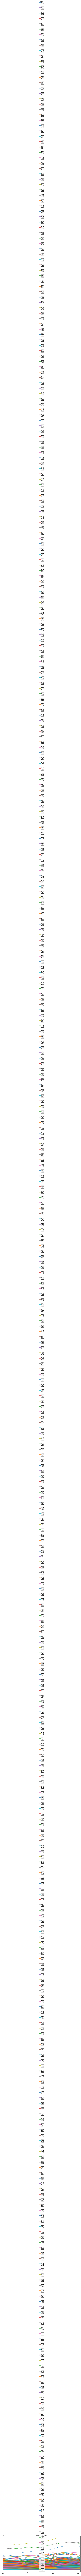

In [31]:
import matplotlib.pyplot as plt
df_ca.plot(figsize=(17,8))
plt.title("Housing Price Trends ")
plt.xlabel('Year')
plt.ylabel('Home Price $')

In [34]:
df_ca.to_csv("./CALI_df.csv", index=False)
#df_ca.to_csv('../Resources/CALI_df.csv',encoding='utf-8')

In [ ]:
##top 3 zip codes have consistently been top 3 performers for the last 3 years
## ## all zip codes display a similar trend with a an inflection point for the year 2008 (housing recession)

In [37]:
neighborhoods_df['2023-02-28'].describe()

count    2.090000e+03
mean     1.033142e+06
std      7.517926e+05
min      1.731630e+05
25%      5.637305e+05
50%      8.019278e+05
75%      1.256288e+06
max      9.048160e+06
Name: 2023-02-28, dtype: float64

In [39]:
neighborhoods_df['2020-01-31'].describe()

count    2.090000e+03
mean     8.542440e+05
std      6.363566e+05
min      9.434500e+04
25%      4.539171e+05
50%      6.581220e+05
75%      1.063660e+06
max      7.541741e+06
Name: 2020-01-31, dtype: float64